<html>
<body>
<h1 style = "color:blue"> Classify Euro coins into three different categories</h1>

<h2 style = "color:red"> Abstract: </h2>
<p>The goal of this notebook is to build a convNN clasification using Tensor Flow library that is desinged to classify a given image of an euro coin into four different categories:.</p>
<p> a) Categorie 0 = 2 euro, 1 euro, or no euro. </p>
<p> b) Categorie 1 = 50 cent, 20 cent, 10 cent. </p>
<p> c) Categorie 2 = 5 cent, 2 cent, 1 cent. </p>

<h2 style = "color:red"> Dataset: </h2>
<p>The dataset employed in the training process is given by the Euro Coin dataset.</p>
</body>
</html>


In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from coins_utils import *
    
#TRAIN_DIR = 'CandidateDataSet2/Augmented_and_Resized_RAW/all/' #For only rotations
TRAIN_DIR = 'CandidateDataSet2/augmented_and_resized_brightness_yuv_RAW/all/' #For rotations and brightness

images_full = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.jpg' in i]
random.shuffle(images_full)
n_images = len(images_full)
print("Number of images in full dataset "+str(n_images))
print("------------------------------------")


#Splitting of the input dataset into train, validation and test set.
train_to_full = 0.6 # Fraction of images used for training
validation_to_full = 0.8 # Fraction of images used for validation
train_to_full_index = int(n_images*train_to_full)
validation_to_full_index = int(n_images*validation_to_full)

#train_images = sorted(images_full[:train_to_full_index])
#validation_images =  sorted(images_full[train_to_full_index:validation_to_full_index])
#test_images =  sorted(images_full[validation_to_full_index:])

train_images = images_full[:train_to_full_index]
validation_images =  images_full[train_to_full_index:validation_to_full_index]
test_images =  images_full[validation_to_full_index:]

n_train_images = len(train_images)
n_validation_images = len(validation_images)
n_test_images = len(test_images)

print("Total number of train images "+str(n_train_images))
print("Total number of validation images "+str(n_validation_images))
print("Total number of test images "+str(n_test_images))
if n_train_images+n_validation_images+n_test_images - n_images != 0:
    print("Warning, there is a problem in the splitting of images")

train = prep_data(train_images, colorSpace = "YUV")
validation = prep_data(validation_images, colorSpace = "YUV")
test = prep_data(test_images, colorSpace = "YUV")

#To make them easier to operate in future
train_images_name = [i.split('/')[-1] for i in train_images]
validation_images_name = [i.split('/')[-1] for i in validation_images]
test_images_name = [i.split('/')[-1] for i in test_images]
print(len(train_images_name), len(validation_images_name), len(test_images_name))

Using TensorFlow backend.


Number of images in full dataset 72792
------------------------------------
Total number of train images 43675
Total number of validation images 14558
Total number of test images 14559
Processed 0 of 43675
Processed 1000 of 43675
Processed 2000 of 43675
Processed 3000 of 43675
Processed 4000 of 43675
Processed 5000 of 43675
Processed 6000 of 43675
Processed 7000 of 43675
Processed 8000 of 43675
Processed 9000 of 43675
Processed 10000 of 43675
Processed 11000 of 43675
Processed 12000 of 43675
Processed 13000 of 43675
Processed 14000 of 43675
Processed 15000 of 43675
Processed 16000 of 43675
Processed 17000 of 43675
Processed 18000 of 43675
Processed 19000 of 43675
Processed 20000 of 43675
Processed 21000 of 43675
Processed 22000 of 43675
Processed 23000 of 43675
Processed 24000 of 43675
Processed 25000 of 43675
Processed 26000 of 43675
Processed 27000 of 43675
Processed 28000 of 43675
Processed 29000 of 43675
Processed 30000 of 43675
Processed 31000 of 43675
Processed 32000 of 43675
Pro

# Getting the LABELS

In [4]:
## read the labels.
labels = pd.read_csv(TRAIN_DIR+'/labels_all.csv')

labels_train_df = labels[labels["FileName"].isin(train_images_name)]
labels_validation_df = labels[labels["FileName"].isin(validation_images_name)]
labels_test_df = labels[labels["FileName"].isin(test_images_name)]


#Example get the Group field and create array with labels (This is not very efficient...)
nb_classes = 3
#labels_train_nocategorical = []
labels_train_nocategorical = len(train_images_name)*[None]
k = 0
for kitem in train_images_name:
        labels_train_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_train_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])
labels_train_nocategorical= np.array(labels_train_nocategorical)
print('Train set labels read!')
    
#labels_validation_nocategorical = []
labels_validation_nocategorical = len(validation_images_name)*[None]
k = 0
for kitem in validation_images_name:
        labels_validation_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_validation_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])      
labels_validation_nocategorical= np.array(labels_validation_nocategorical)
print('Validation set labels read!')

labels_test_nocategorical = []
labels_test_nocategorical = len(test_images_name)*[None]
k = 0
for kitem in test_images_name:
        labels_test_nocategorical[k] = labels[labels["FileName"] == kitem].iloc[0][2]
        k += 1
        #labels_test_nocategorical.append(labels[labels["FileName"] == kitem].iloc[0][2])      
labels_test_nocategorical= np.array(labels_test_nocategorical)
print('Test set labels read!')


#Convert to categorical labels (vectors)
from keras.utils import np_utils
labels_train = np_utils.to_categorical(labels_train_nocategorical, nb_classes)
labels_validation = np_utils.to_categorical(labels_validation_nocategorical, nb_classes)
labels_test = np_utils.to_categorical(labels_test_nocategorical, nb_classes)

Train set labels read!
Validation set labels read!
Test set labels read!


In [3]:
labels

FileName  CoinorNoCoin  Group  \
0      P70216-133746_Candidate_10_Aug_100_0_Brightnes...             0      1   
1      P70216-133746_Candidate_10_Aug_100_0_Brightnes...             0      1   
2      P70216-133746_Candidate_10_Aug_100_0_Brightnes...             0      1   
3      P70216-133746_Candidate_10_Aug_100_180_Brightn...             0      1   
4      P70216-133746_Candidate_10_Aug_100_180_Brightn...             0      1   
5      P70216-133746_Candidate_10_Aug_100_180_Brightn...             0      1   
6      P70216-133746_Candidate_10_Aug_100_270_Brightn...             0      1   
7      P70216-133746_Candidate_10_Aug_100_270_Brightn...             0      1   
8      P70216-133746_Candidate_10_Aug_100_270_Brightn...             0      1   
9      P70216-133746_Candidate_10_Aug_100_90_Brightne...             0      1   
10     P70216-133746_Candidate_10_Aug_100_90_Brightne...             0      1   
11     P70216-133746_Candidate_10_Aug_100_90_Brightne...             0      1   
12     P70216-133746_Candidate_11_Aug_100_0_Brightnes...             0      1   
13     P70216-133746_Candidate_11_Aug_100_0_Brightnes...             0      1   
14     P70216-133746_Candidate_11_Aug_100_0_Brightnes...             0      1   
15     P70216-133746_Candidate_11_Aug_100_180_Brightn...             0      1   
16     P70216-133746_Candidate_11_Aug_100_180_Brightn...             0      1   
17     P70216-133746_Candidate_11_Aug_100_180_Brightn...             0      1   
18     P70216-133746_Candidate_11_Aug_100_270_Brightn...             0      1   
19     P70216-133746_Candidate_11_Aug_100_270_Brightn...             0      1   
20     P70216-133746_Candidate_11_Aug_100_270_Brightn...             0      1   
21     P70216-133746_Candidate_11_Aug_100_90_Brightne...             0      1   
22     P70216-133746_Candidate_11_Aug_100_90_Brightne...             0      1   
23     P70216-133746_Candidate_11_Aug_100_90_Brightne...             0      1   
24     P70216-133746_Candidate_12_Aug_100_0_Brightnes...             0      1   
25     P70216-133746_Candidate_12_Aug_100_0_Brightnes...             0      1   
26     P70216-133746_Candidate_12_Aug_100_0_Brightnes...             0      1   
27     P70216-133746_Candidate_12_Aug_100_180_Brightn...             0      1   
28     P70216-133746_Candidate_12_Aug_100_180_Brightn...             0      1   
29     P70216-133746_Candidate_12_Aug_100_180_Brightn...             0      1   
...                                                  ...           ...    ...   
27114  P70210-170718_Candidate_7_Aug_100_270_Brightne...             0      1   
27115  P70210-170718_Candidate_7_Aug_100_270_Brightne...             0      1   
27116  P70210-170718_Candidate_7_Aug_100_270_Brightne...             0      1   
27117  P70210-170718_Candidate_7_Aug_100_90_Brightnes...             0      1   
27118  P70210-170718_Candidate_7_Aug_100_90_Brightnes...             0      1   
27119  P70210-170718_Candidate_7_Aug_100_90_Brightnes...             0      1   
27120  P70210-170718_Candidate_8_Aug_100_0_Brightness...             0      1   
27121  P70210-170718_Candidate_8_Aug_100_0_Brightness...             0      1   
27122  P70210-170718_Candidate_8_Aug_100_0_Brightness...             0      1   
27123  P70210-170718_Candidate_8_Aug_100_180_Brightne...             0      1   
27124  P70210-170718_Candidate_8_Aug_100_180_Brightne...             0      1   
27125  P70210-170718_Candidate_8_Aug_100_180_Brightne...             0      1   
27126  P70210-170718_Candidate_8_Aug_100_270_Brightne...             0      1   
27127  P70210-170718_Candidate_8_Aug_100_270_Brightne...             0      1   
27128  P70210-170718_Candidate_8_Aug_100_270_Brightne...             0      1   
27129  P70210-170718_Candidate_8_Aug_100_90_Brightnes...             0      1   
27130  P70210-170718_Candidate_8_Aug_100_90_Brightnes...             0      1   
27131  P70210-170718_Candidate_8_Aug_100_90_Brightnes...             0      1  

# Sanity check, we are reading everything properly

P70210-162517_Candidate_5_Aug_100_0_Brightness_-25.jpg
This is 1 euro or 2 euro
(100, 100, 3)


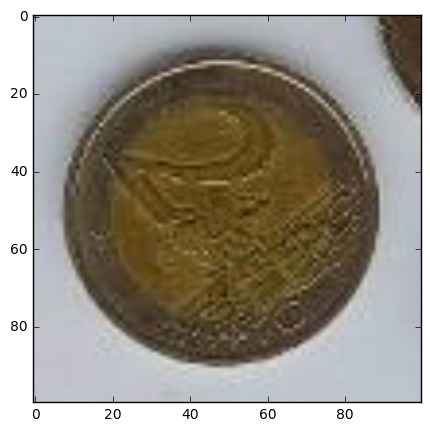

P70216-141456_Candidate_2_Aug_100_270_Brightness_-25.jpg
This is 5, 2, 1 cent
(100, 100, 3)


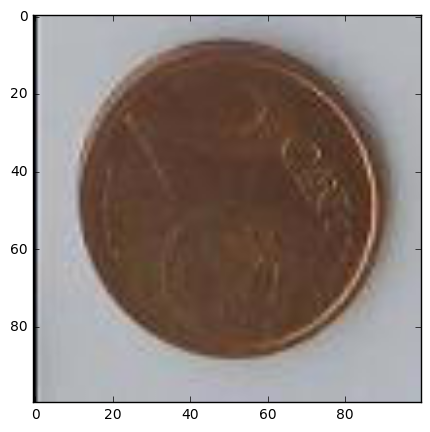

P70216-134243_Candidate_24_Aug_100_90_Brightness_-25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


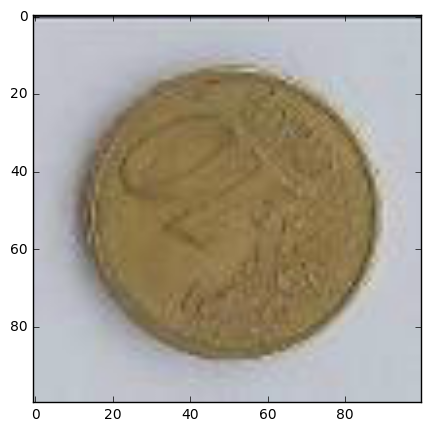

P70216-141115_Candidate_8_Aug_100_0_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


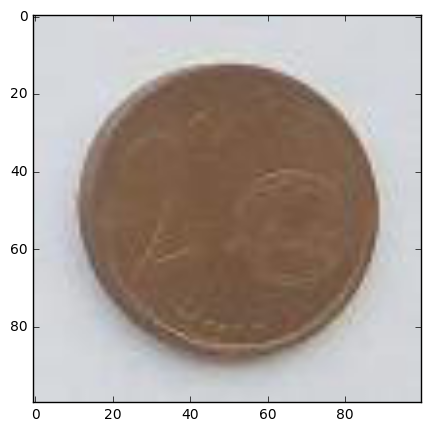

P70210-161717_Candidate_1_Aug_100_270_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


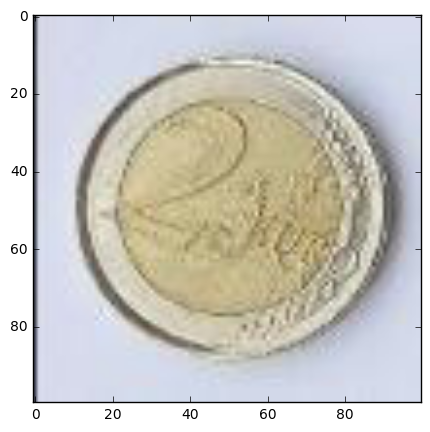

P70216-135435_Candidate_28_Aug_100_0_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


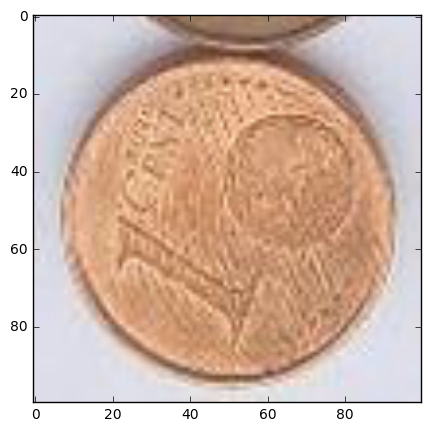

P70216-140827_Candidate_22_Aug_100_90_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


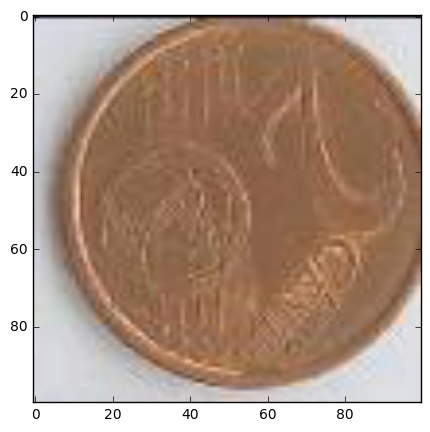

P70210-162747_Candidate_10_Aug_100_180_Brightness_-25.jpg
This is 1 euro or 2 euro
(100, 100, 3)


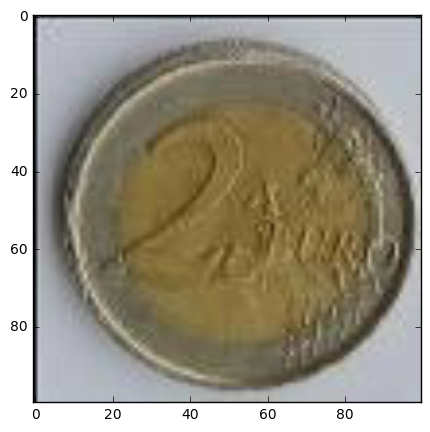

P70210-170616_Candidate_10_Aug_100_90_Brightness_25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


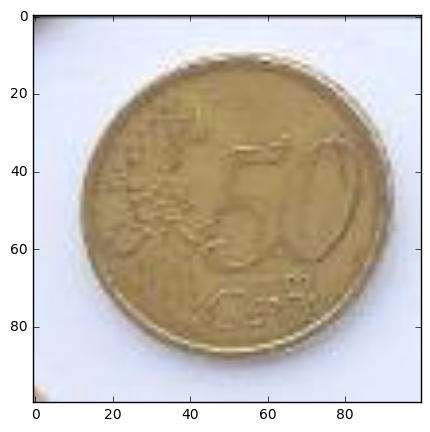

P70216-135549_Candidate_11_Aug_100_180_Brightness_25.jpg
This is 5, 2, 1 cent
(100, 100, 3)


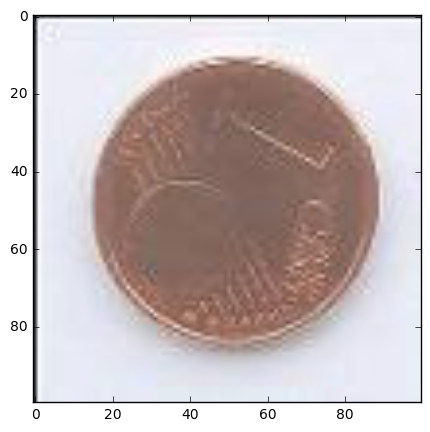

P70210-172028_Candidate_10_Aug_100_0_Brightness_25.jpg
This is 5, 2, 1 cent
(100, 100, 3)


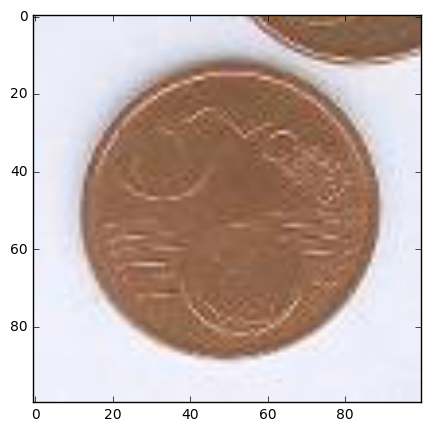

P70210-170419_Candidate_5_Aug_100_180_Brightness_-25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


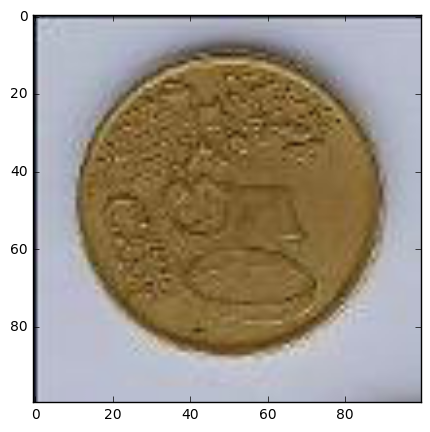

P70210-164143_Candidate_12_Aug_100_180_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


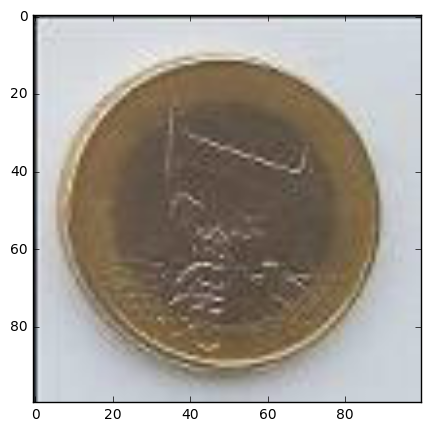

P70210-173056_Candidate_14_Aug_100_270_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


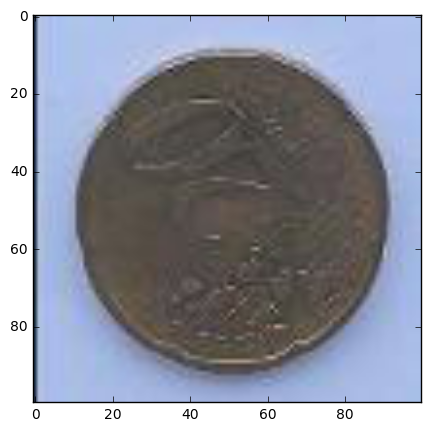

P70216-140928_Candidate_22_Aug_100_0_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


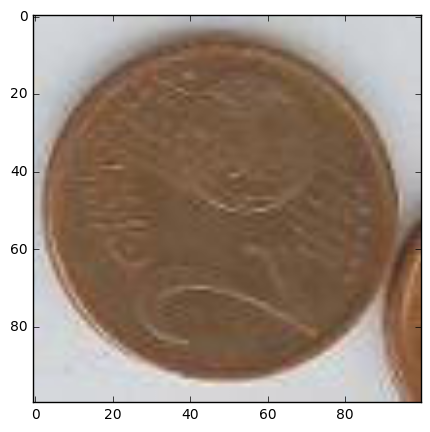

P70216-134839_Candidate_7_Aug_100_270_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


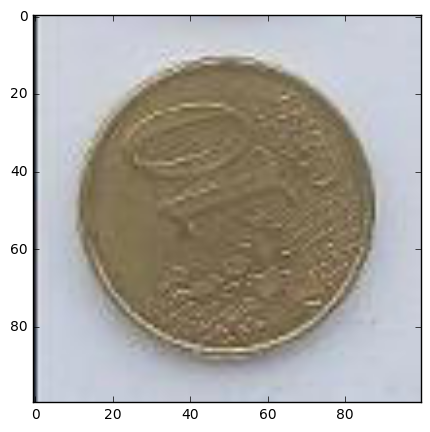

P70210-172744_Candidate_17_Aug_100_270_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


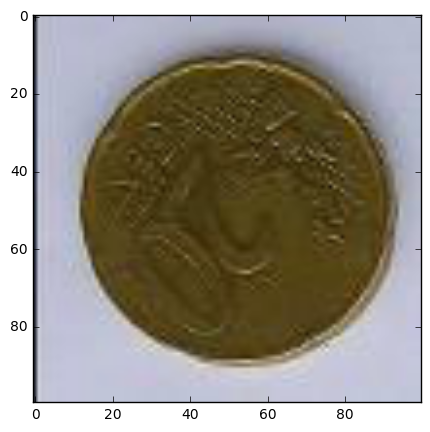

P70210-165530_Candidate_5_Aug_100_270_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


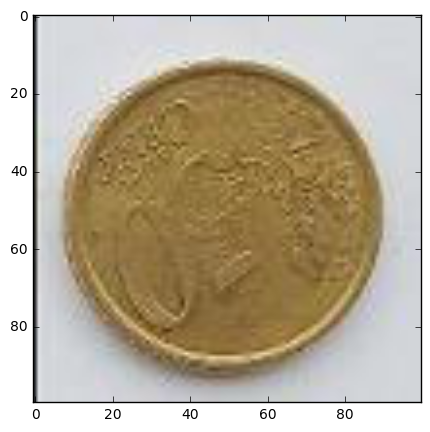

P70216-134723_Candidate_23_Aug_100_180_Brightness_0.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


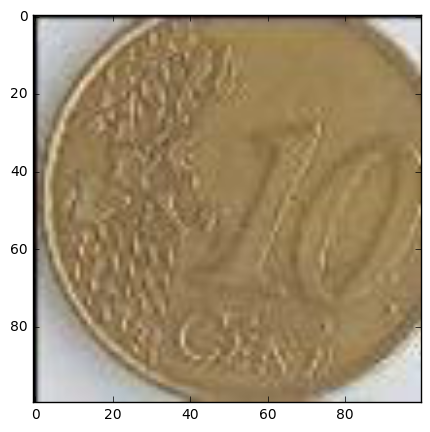

P70210-172941_Candidate_18_Aug_100_270_Brightness_25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


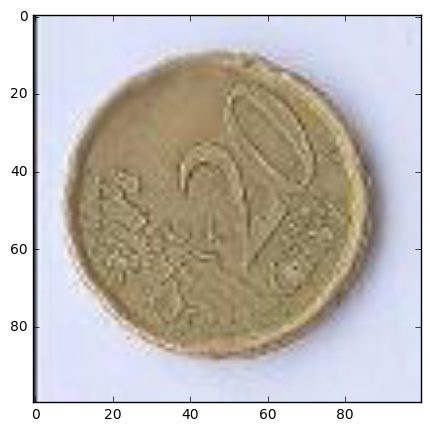

P70216-134151_Candidate_9_Aug_100_180_Brightness_-25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


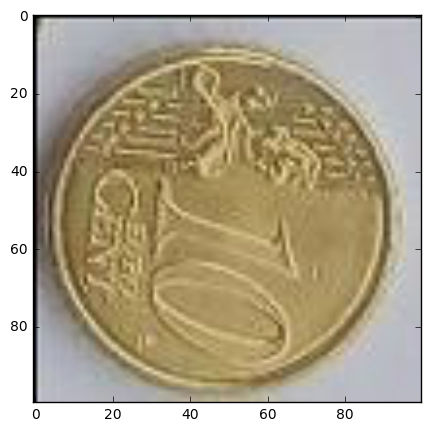

P70216-140928_Candidate_26_Aug_100_90_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


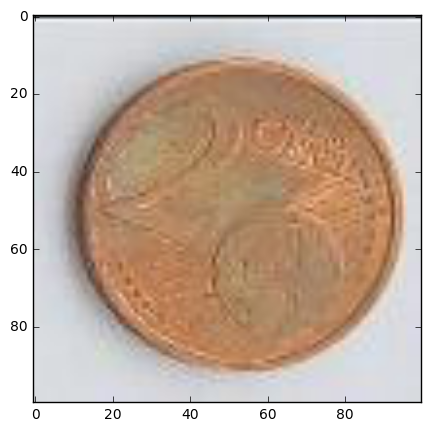

P70210-163559_Candidate_16_Aug_100_90_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


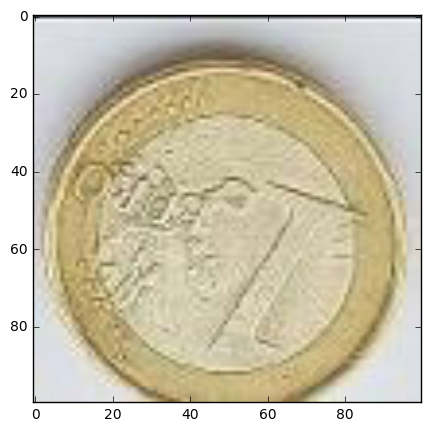

P70216-135420_Candidate_16_Aug_100_180_Brightness_-25.jpg
This is 5, 2, 1 cent
(100, 100, 3)


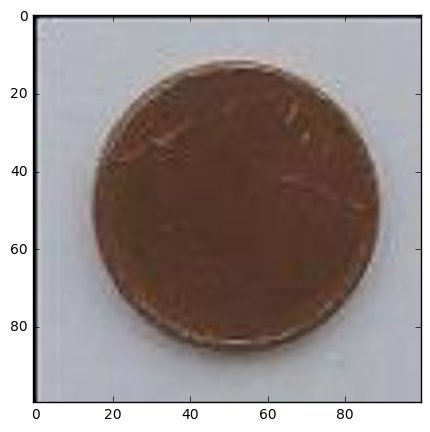

P70210-162818_Candidate_19_Aug_100_180_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


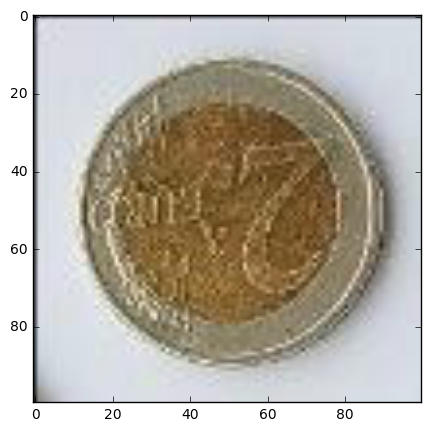

P70216-141456_Candidate_4_Aug_100_270_Brightness_25.jpg
This is 5, 2, 1 cent
(100, 100, 3)


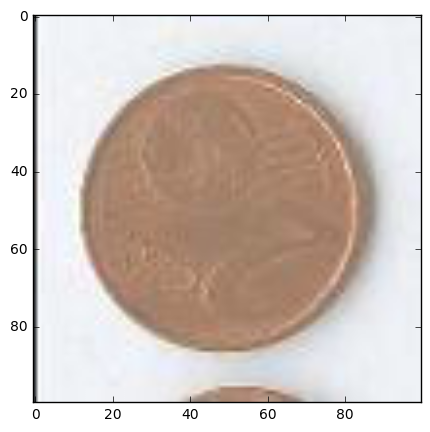

P70216-133802_Candidate_5_Aug_100_180_Brightness_25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


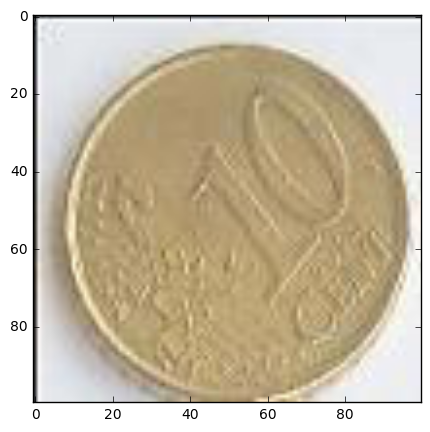

P70216-140942_Candidate_14_Aug_100_0_Brightness_0.jpg
This is 5, 2, 1 cent
(100, 100, 3)


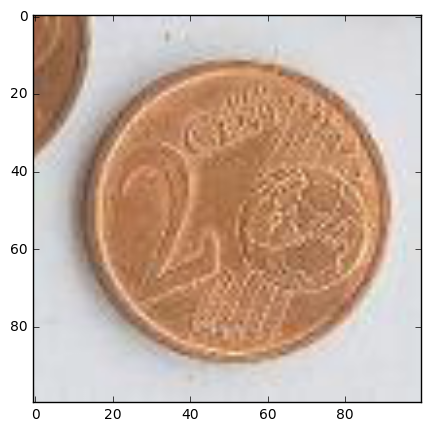

P70210-173008_Candidate_13_Aug_100_90_Brightness_25.jpg
This is 50, 20 or 10 cent
(100, 100, 3)


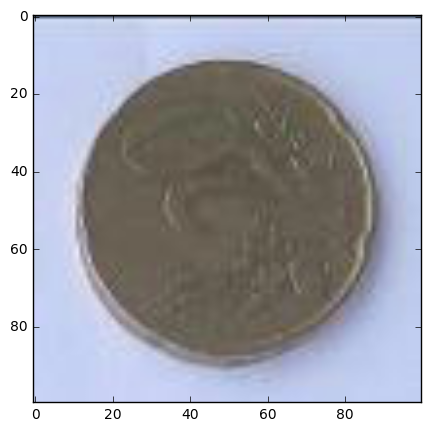

P70210-161835_Candidate_15_Aug_100_0_Brightness_0.jpg
This is 1 euro or 2 euro
(100, 100, 3)


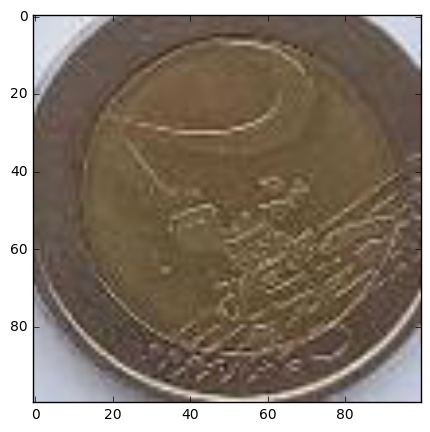

In [5]:
#Print some coins
def printSomeCoints(img, train_images_name, labels, ncoins):
    for i in range(0,ncoins):
        print(train_images_name[i])
        if labels[i] == 0.:
            print("This is 1 euro or 2 euro")
        if labels[i] == 1.:
            print("This is 50, 20 or 10 cent")
        if labels[i] == 2.:
            print("This is 5, 2, 1 cent")
        plt.figure(figsize=(10,5))
        print(train[i].shape)
        plt.imshow(cv2.cvtColor(train[i], cv2.COLOR_YUV2RGB))
        plt.show()
    
    
printSomeCoints(train, train_images_name, labels_train_nocategorical, 30)

<html>
<body>
<h2 style = "color:red"> Building the classificator (work in progress..): </h2>
<p> Use the training dataset to build the classificator using a ConvNN.</p>
</body>
</html>

In [6]:
#Loading keras deep learnig libraries to build the model: https://keras.io/ 
from keras.layers import Input, Dense, Flatten, Dropout, Activation, advanced_activations, Convolution2D, MaxPooling2D
from keras.models import Model, model_from_json
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import initializations

In [7]:
#Model hyperparameters
batch_size = 32 # in each iteration, we consider batch_size training examples at once
num_epochs = 15 # we iterate num_epochs times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 62 # ...switching to 64 after the first pooling layer
conv_depth_3 = 128 # ...switching to 64 after the first pooling layer
conv_depth_4 = 256 # ...switching to 64 after the first pooling layer
conv_depth_5 = 512 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with this probability 
drop_prob_2 = 0.5 # dropout in the FC layer with this probability 
hidden_size = 64 # the FC layer will this neurons
data_augmentation = False # Whether to use or not data augmentation

ROWS = 100
COLS = 100
CHANNELS = 3

NN = False
ConvNN = True
if ConvNN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!
    conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, border_mode='same', activation='tanh')(inp)
    pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_1)
    conv_2 = Convolution2D(conv_depth_2, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_1)
    pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
    conv_3 = Convolution2D(conv_depth_3, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_2)
    #pool_3 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_3)
    #conv_4 = Convolution2D(conv_depth_4, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_3)
    #pool_4 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_4)
    #conv_5 = Convolution2D(conv_depth_5, kernel_size, kernel_size, border_mode='same', activation='tanh')(pool_4)
                       

    flat = Flatten()(conv_3)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

if NN == True:
    #Architecture
    inp = Input(shape=(ROWS, COLS, CHANNELS)) # N.B. depth goes first in Keras!                  
    flat = Flatten()(inp)
    hidden = Dense(hidden_size, activation='tanh')(flat)
    out = Dense(nb_classes, activation='sigmoid')(hidden)
    model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

    
#print the summary of the architecture
model.summary()

#Visulize the model if desired
#from keras.utils.visualize_util import plot
#plot(model, to_file='Example_of_CNN_CatsVsDogs.pdf')

# reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0000001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')


# Let's train the model using SGD
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])

# Let's train the SGD model WITHOUT using data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(train, labels_train, batch_size=batch_size, nb_epoch=num_epochs, validation_data=(validation, labels_validation), shuffle=True, callbacks=[reduce_lr,early_stopping])
                       
                       

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 100, 100, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 100, 100, 32)  896         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 50, 50, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 50, 50, 62)    17918       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

# Learning curves (check the performance)

dict_keys(['val_loss', 'acc', 'loss', 'val_acc', 'lr'])


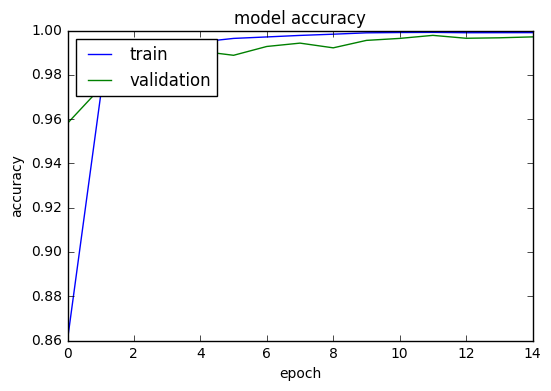

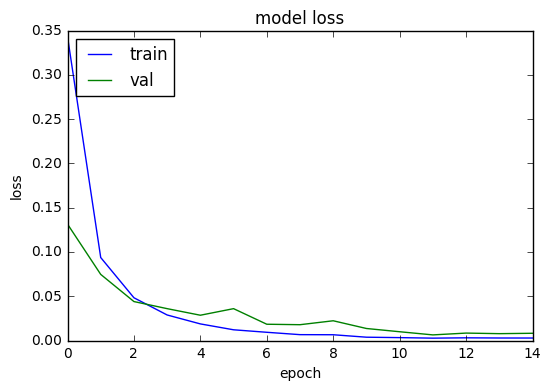

In [8]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('Accuracy_Example_Coin_Classifier.pdf')
plt.close()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('Loss_Example_Coin_Classifier.pdf')
plt.close()

# Save 

In [9]:
SaveModel(model, "Model_Example_Coin_Classifier_yuv")

Saved model Model_Example_Coin_Classifier_yuv to disk


0

# Load and Test model

Loaded model Model_Example_Coin_Classifier_yuv from disk 

PREDICTIONS 

 0.00000033 of 1,2 euro 

 0.00001026 of 50,20,10 cent 

 0.92511666 of 5,2,1 



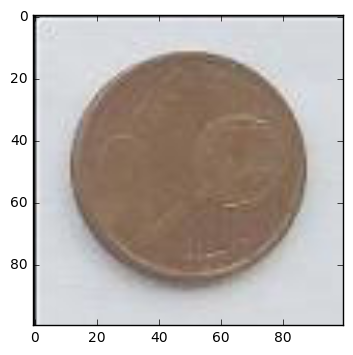

 0.00000137 of 1,2 euro 

 0.00002056 of 50,20,10 cent 

 0.97705531 of 5,2,1 



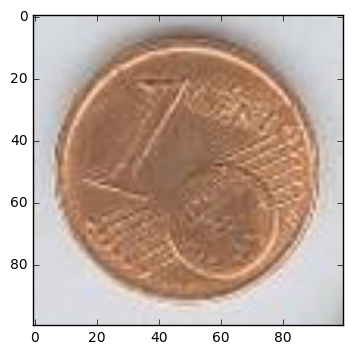

 0.96911263 of 1,2 euro 

 0.00008054 of 50,20,10 cent 

 0.00003963 of 5,2,1 



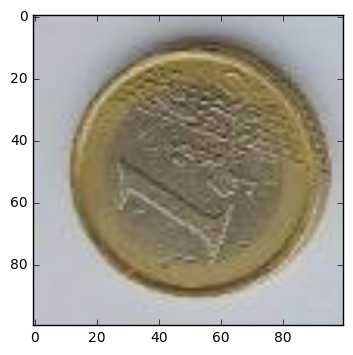

 0.69747114 of 1,2 euro 

 0.00014557 of 50,20,10 cent 

 0.00000460 of 5,2,1 



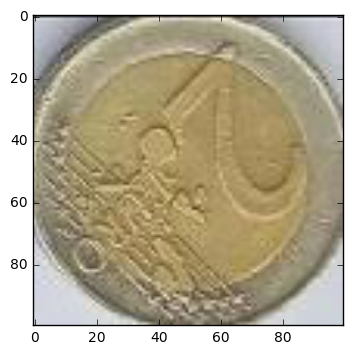

 0.00000081 of 1,2 euro 

 0.92500931 of 50,20,10 cent 

 0.00000707 of 5,2,1 



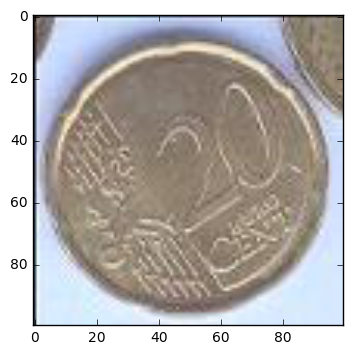

 0.00000134 of 1,2 euro 

 0.23313677 of 50,20,10 cent 

 0.00001821 of 5,2,1 



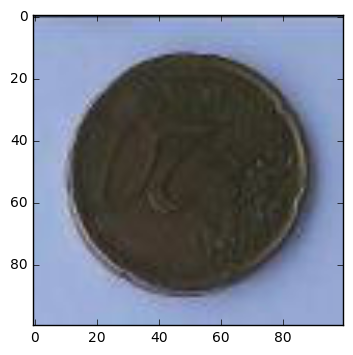

 0.00000019 of 1,2 euro 

 0.03019879 of 50,20,10 cent 

 0.00002139 of 5,2,1 



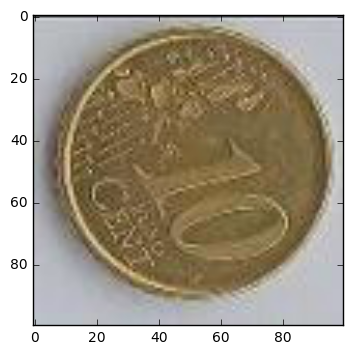

 0.99720770 of 1,2 euro 

 0.00003559 of 50,20,10 cent 

 0.00000676 of 5,2,1 



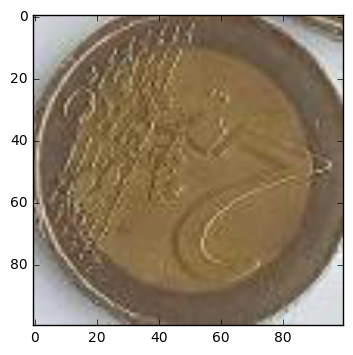

 0.85950500 of 1,2 euro 

 0.00009271 of 50,20,10 cent 

 0.00004055 of 5,2,1 



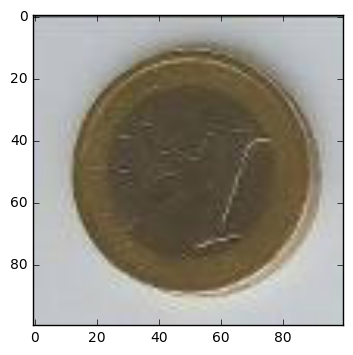

 0.00001079 of 1,2 euro 

 0.00000230 of 50,20,10 cent 

 0.98269272 of 5,2,1 



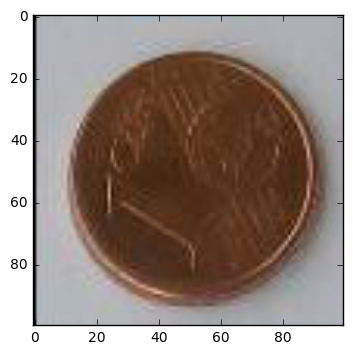

In [11]:
#Useful to test.
LoadAndTest = True
nTest = 10
if LoadAndTest == True:
    loaded_model=LoadModel("Model_Example_Coin_Classifier_yuv")  
    # evaluate loaded model on test data
    loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
    
    #score_train = loaded_model.evaluate(train, labels_train, verbose=0)
    #score_validation = loaded_model.evaluate(validation, labels_validation, verbose=0)
    #print "Training %s: %.2f%%" % (loaded_model.metrics_names[1], score_train[1]*100)
    #print "Validation %s: %.2f%%" % (loaded_model.metrics_names[1], score_validation[1]*100)    
    
    print("PREDICTIONS \n")
    reduced_test = test[:nTest]
    
    predictedLabel = loaded_model.predict(reduced_test)

    for i in range(0,nTest):
        print(" %.8f of 1,2 euro \n" % predictedLabel[i,0])
        print(" %.8f of 50,20,10 cent \n" % predictedLabel[i,1])
        print(" %.8f of 5,2,1 \n" % predictedLabel[i,2])
        plt.imshow(cv2.cvtColor(reduced_test[i], cv2.COLOR_YUV2RGB))
        plt.show()
    
        
    